## 📥 Загрузка данных
Загрузим датасет с умных часов и проведем начальный осмотр.

In [4]:
# Импорт нужных библиотек
import pandas as pd
from google.colab import files

# Загрузка файла
uploaded = files.upload()

# Чтение CSV
df = pd.read_csv("lifestyle_dataset.csv")

# Просмотр первых 5 строк
df.head()


Saving lifestyle_dataset.csv to lifestyle_dataset (1).csv


,Age,Gender,Occupation,Height_cm,Weight_kg,Country,Archetype,DailyCalorieIntake,SleepHours,PhysicalActivity_min,...,ScreenTime_hrs,CommuteTime_hrs,TasksCompleted_day,ProductivityScore,StressLevel,MoodScore,MeditationTime_min,CodingHours_day,CodingProblems_day,DebuggingRatio
0,56,M,Manager,180.4,96.0,UK,Health Enthusiast,2602,8.2,64,...,4.1,0.0,5,6.1,4.8,9.1,21,1.3,1,0.33
1,46,M,Student,180.7,78.7,France,Student,2226,6.9,52,...,5.3,0.0,0,1.6,4.9,4.1,18,3.4,1,0.57
2,32,F,Unemployed,169.9,55.8,India,Student,1943,5.0,18,...,6.4,1.8,5,3.3,6.2,5.7,1,2.9,1,0.28
3,60,F,Teacher,172.1,64.6,Canada,Workaholic,1933,5.7,30,...,10.9,0.9,10,4.3,9.2,3.5,2,5.3,7,0.31
4,25,F,Student,156.5,53.5,Australia,Sedentary,1876,6.3,2,...,3.0,1.7,5,1.4,8.1,5.5,0,0.0,0,0.47


## 🧹 Очистка данных
Удалим пустые строки, заменим пропуски, приведем названия колонок к нижнему регистру.


In [6]:
import pandas as pd

# Загрузка данных (если ещё не загружено)
# df = pd.read_csv("Archetype_Health_Productivity.csv")

# Удаляем полностью пустые строки
df.dropna(how='all', inplace=True)

# Приводим имена колонок к нижнему регистру и заменяем пробелы на подчёркивания
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Удалим категориальные колонки (если не планируем их кодировать)
categorical_cols = ['gender', 'occupation', 'country', 'archetype']
df.drop(columns=categorical_cols, inplace=True, errors='ignore')

# Преобразуем все значения к числовым, ошибки — в NaN
df = df.apply(pd.to_numeric, errors='coerce')

# Удалим строки, где отсутствует целевая переменная (например, продуктивность)
df.dropna(subset=['productivityscore'], inplace=True)

# Заполним все остальные пропуски средними значениями
df.fillna(df.mean(numeric_only=True), inplace=True)

# Просмотр формы и базовой статистики
print(f"Размер датафрейма: {df.shape}")
print(df.describe())
df.head()


Размер датафрейма: (10000, 20)
                age     height_cm     weight_kg  dailycalorieintake  \
count  10000.000000  10000.000000  10000.000000        10000.000000   
mean      41.557600    170.118110     70.036710         2127.958000   
std       13.749581      9.967647     15.216758          367.928286   
min       18.000000    125.200000     13.600000         1200.000000   
25%       30.000000    163.400000     60.000000         1881.000000   
50%       41.500000    170.100000     70.000000         2123.000000   
75%       53.000000    176.900000     80.200000         2366.000000   
max       65.000000    211.500000    131.200000         3513.000000   

         sleephours  physicalactivity_min   stepsperday  restingheartrate_bpm  \
count  10000.000000          10000.000000  10000.000000          10000.000000   
mean       6.791900             29.075800   6130.770600             69.431600   
std        1.356762             22.029916   3230.467296              5.006958   
min  

,age,height_cm,weight_kg,dailycalorieintake,sleephours,physicalactivity_min,stepsperday,restingheartrate_bpm,waterintake_l,weeklybodyweighttrend_kg,screentime_hrs,commutetime_hrs,taskscompleted_day,productivityscore,stresslevel,moodscore,meditationtime_min,codinghours_day,codingproblems_day,debuggingratio
0,56,180.4,96.0,2602,8.2,64,8624,69,2.56,0.29,4.1,0.0,5,6.1,4.8,9.1,21,1.3,1,0.33
1,46,180.7,78.7,2226,6.9,52,4242,76,2.12,-0.41,5.3,0.0,0,1.6,4.9,4.1,18,3.4,1,0.57
2,32,169.9,55.8,1943,5.0,18,9230,64,1.67,-0.12,6.4,1.8,5,3.3,6.2,5.7,1,2.9,1,0.28
3,60,172.1,64.6,1933,5.7,30,3878,66,1.50,-0.12,10.9,0.9,10,4.3,9.2,3.5,2,5.3,7,0.31
4,25,156.5,53.5,1876,6.3,2,3573,73,1.75,0.37,3.0,1.7,5,1.4,8.1,5.5,0,0.0,0,0.47


## 📊 Разведочный анализ данных (EDA)
Построим графики распределения признаков, чтобы лучше понять структуру данных.


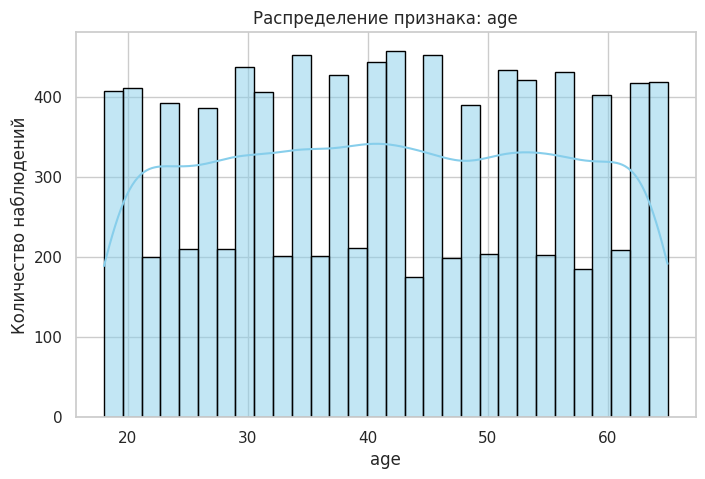

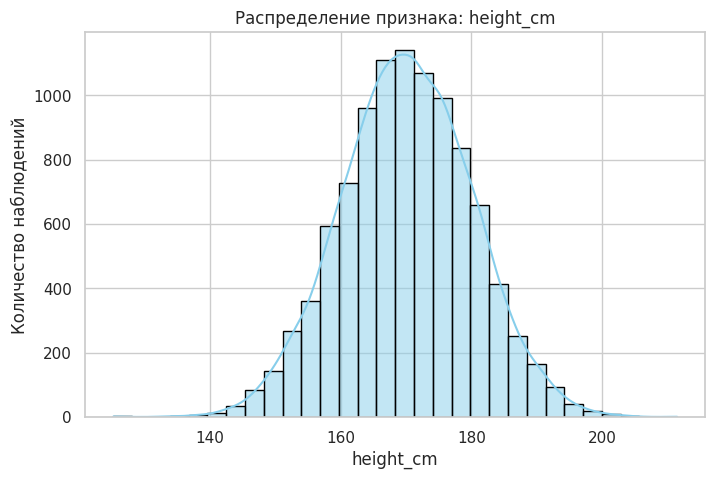

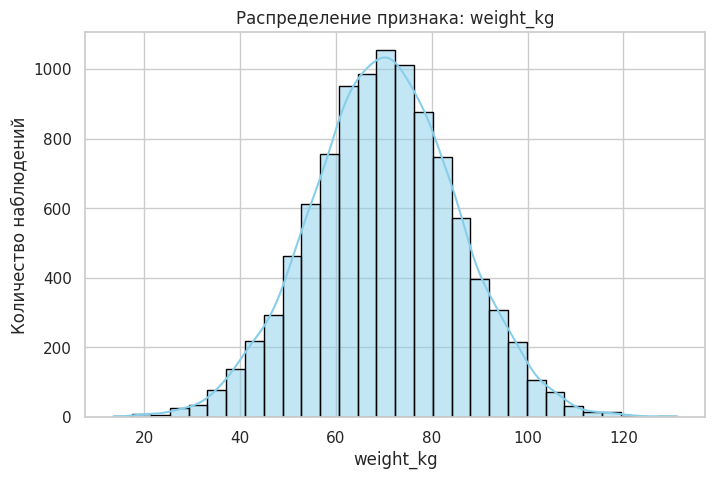

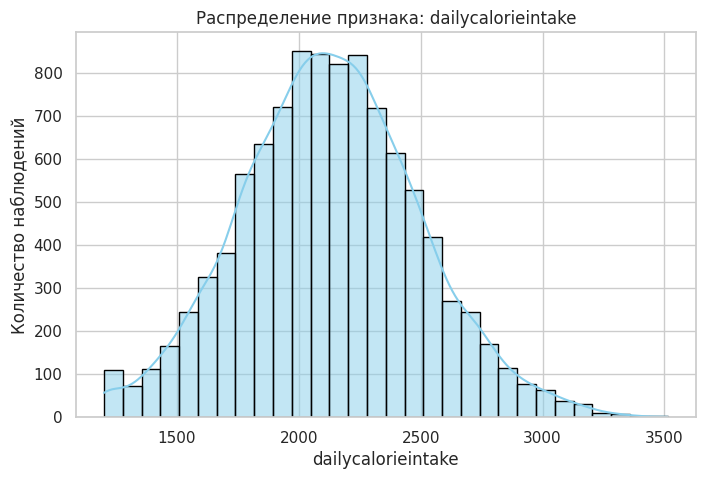

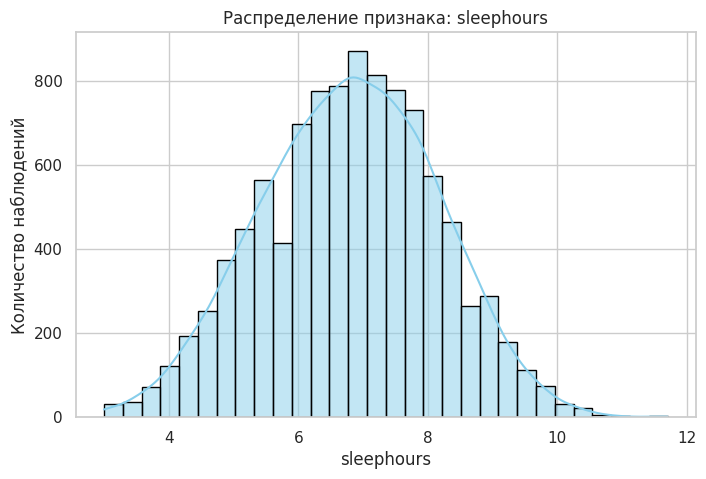

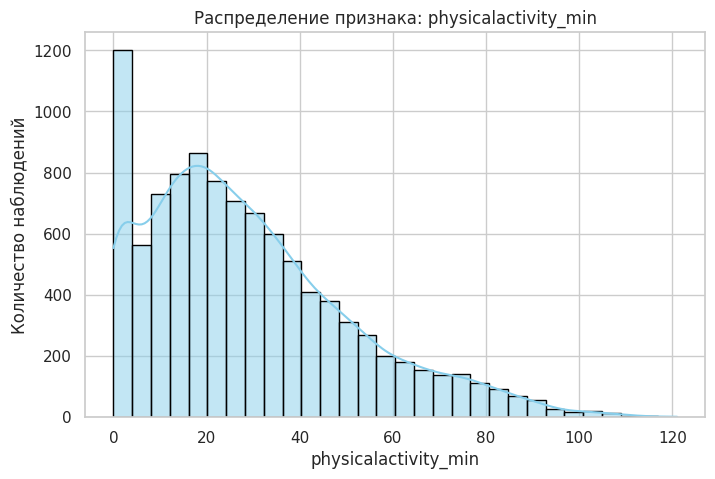

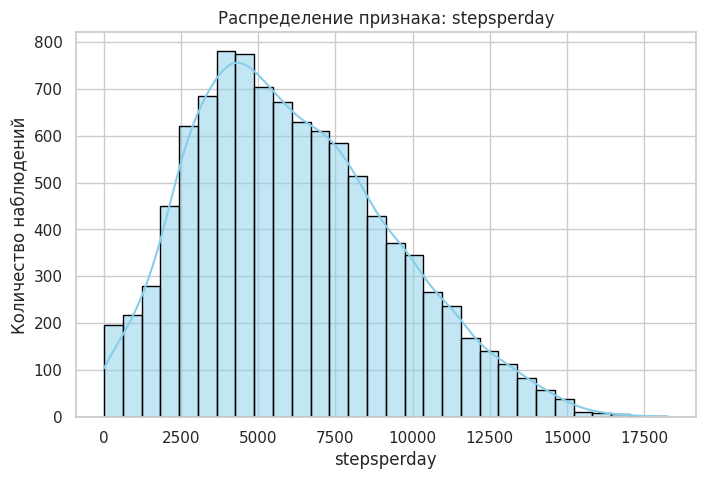

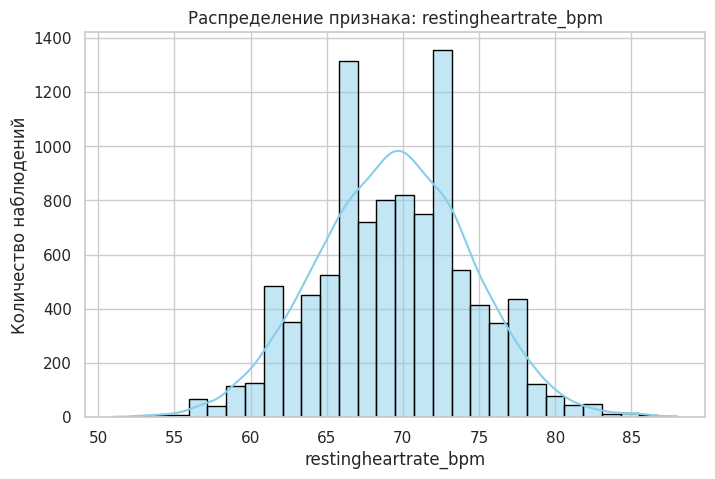

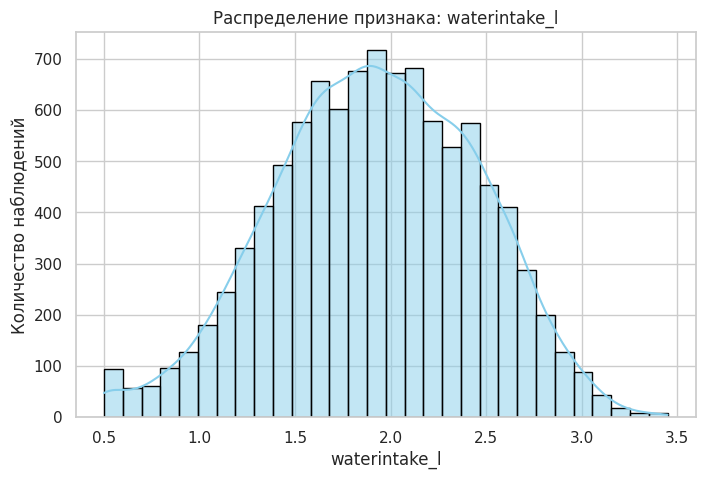

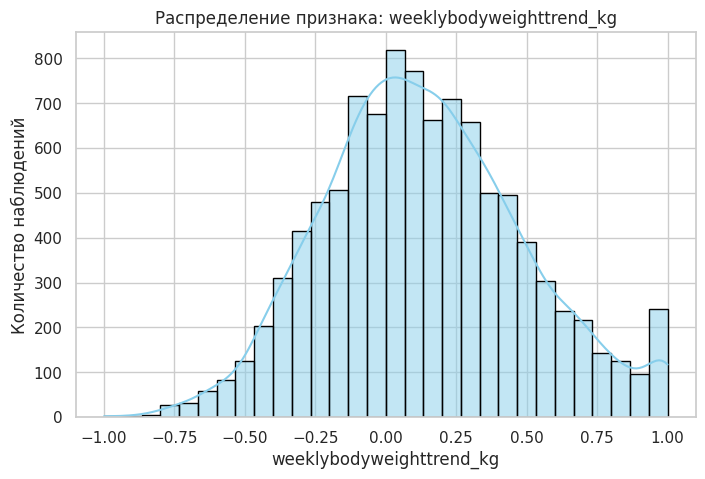

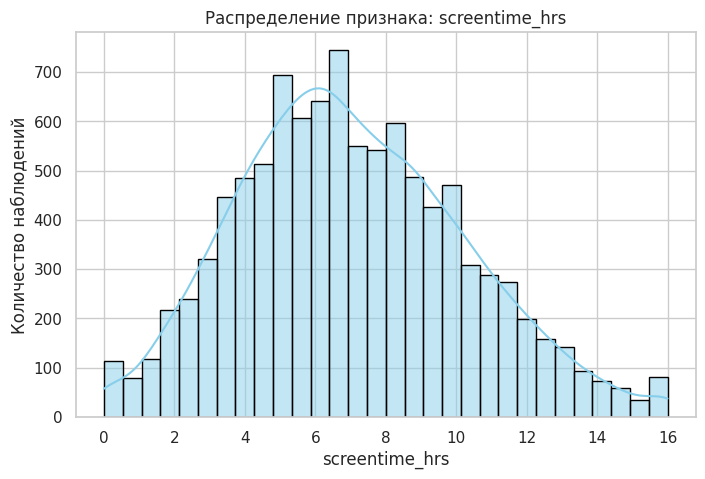

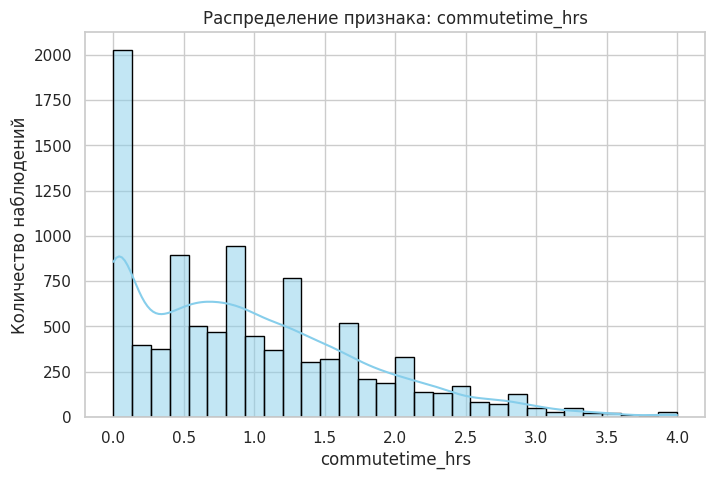

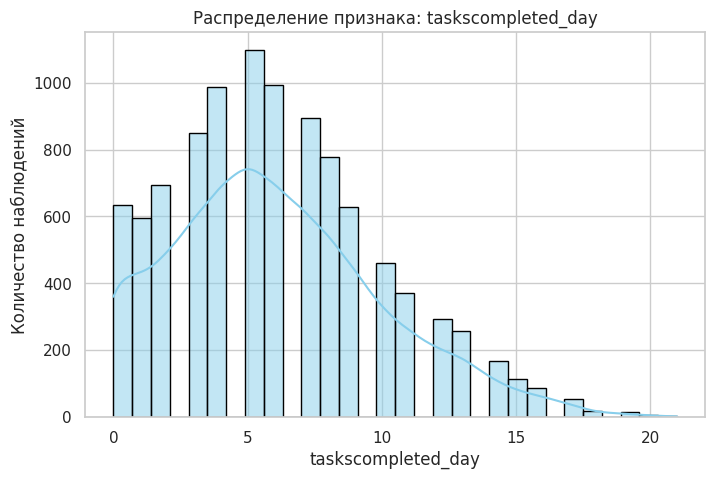

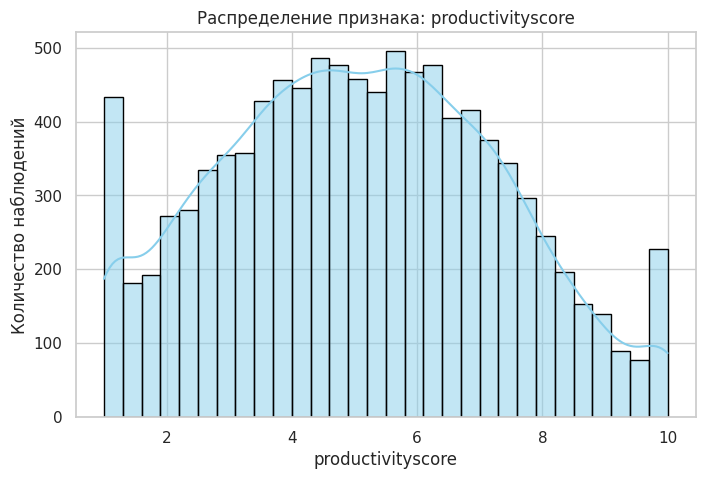

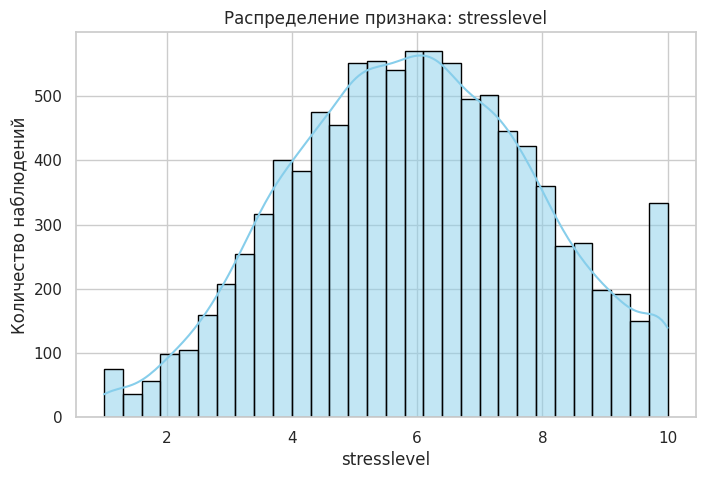

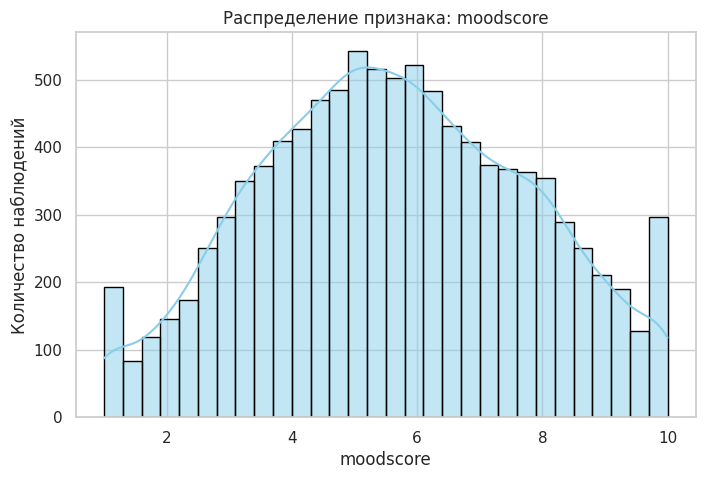

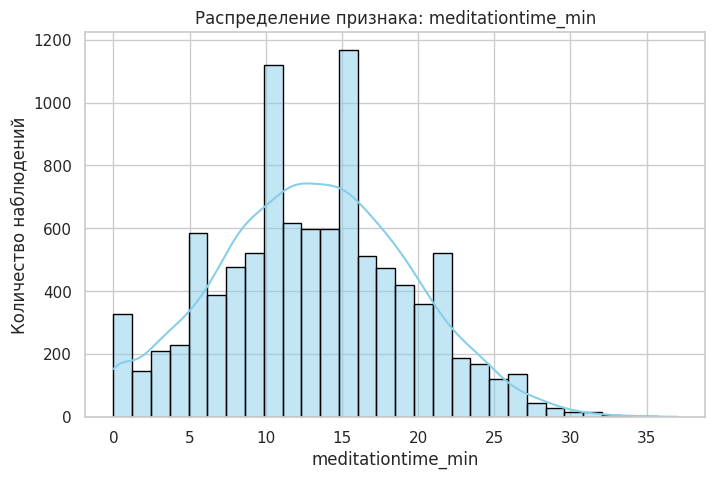

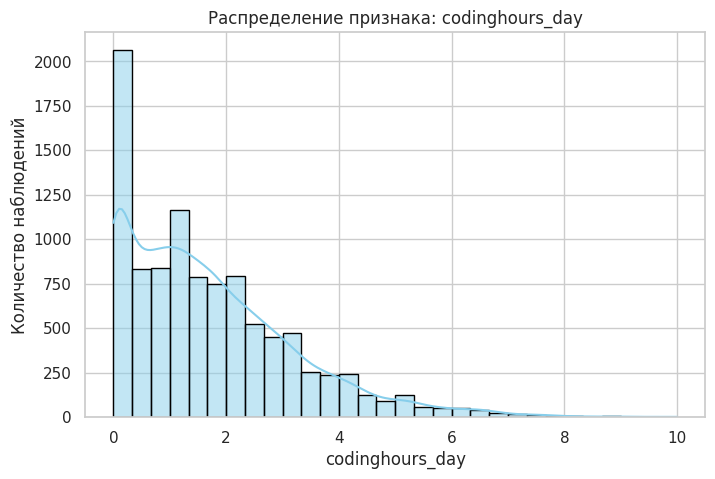

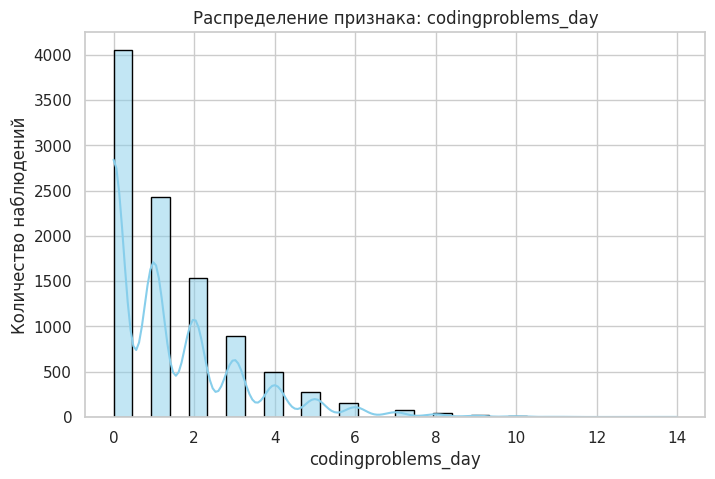

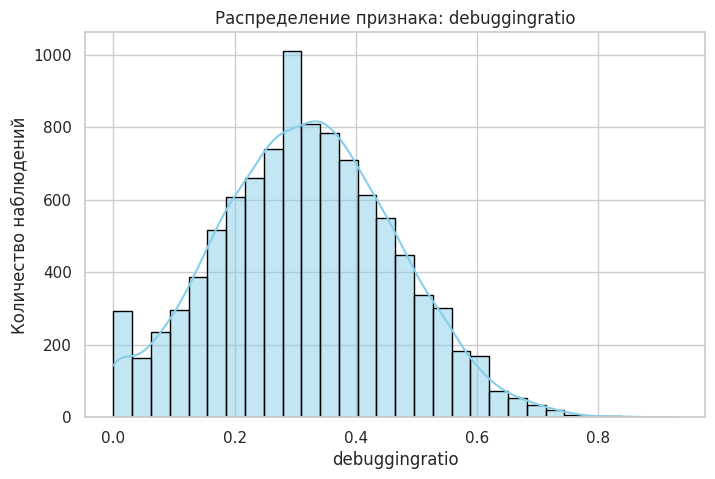

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Получаем числовые колонки (все, так как user_id отсутствует)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Строим графики распределения
for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True, bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Распределение признака: {col}')
    plt.xlabel(col)
    plt.ylabel('Количество наблюдений')
    plt.grid(True)
    plt.show()


Кореляция всех параметров

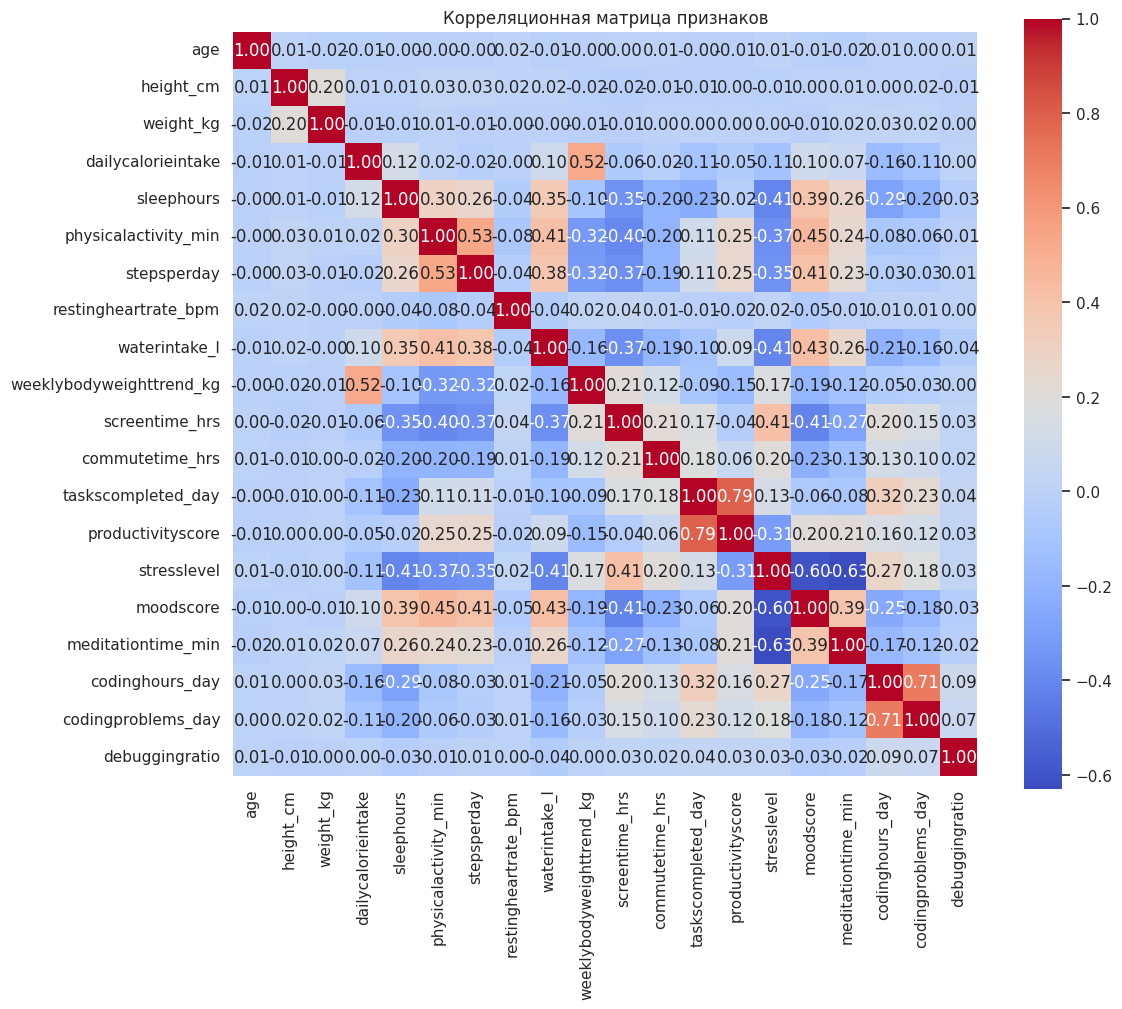


Корреляция признаков с 'stresslevel':
screentime_hrs              0.410254
codinghours_day             0.268775
commutetime_hrs             0.202521
codingproblems_day          0.179573
weeklybodyweighttrend_kg    0.168906
taskscompleted_day          0.133913
debuggingratio              0.029335
restingheartrate_bpm        0.022292
age                         0.014612
weight_kg                   0.001625
height_cm                  -0.014752
dailycalorieintake         -0.114154
productivityscore          -0.313290
stepsperday                -0.350644
physicalactivity_min       -0.368001
waterintake_l              -0.406537
sleephours                 -0.407859
moodscore                  -0.601686
meditationtime_min         -0.628865
Name: stresslevel, dtype: float64
Лучший коррелирующий признак с 'stresslevel': 'screentime_hrs' (корреляция 0.410)

Корреляция признаков с 'productivityscore':
taskscompleted_day          0.793723
stepsperday                 0.254699
physicalactivity_min   

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Приводим колонки к нижнему регистру, без пробелов
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Выбираем числовые колонки
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Строим корреляционную матрицу по числовым признакам
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Корреляционная матрица признаков")
plt.show()

# Кандидаты в таргеты (проверь, что такие колонки есть)
target_candidates = ['stresslevel', 'productivityscore', 'moodscore']

for target in target_candidates:
    if target in corr_matrix.columns:
        corr_with_target = corr_matrix[target].drop(target).sort_values(ascending=False)
        print(f"\nКорреляция признаков с '{target}':")
        print(corr_with_target)

        # Признак с максимальной корреляцией
        best_feature = corr_with_target.idxmax()
        best_corr = corr_with_target.max()
        print(f"Лучший коррелирующий признак с '{target}': '{best_feature}' (корреляция {best_corr:.3f})")
    else:
        print(f"\nВнимание: колонка '{target}' отсутствует в данных.")


### 🎯 Анализ целевой переменной


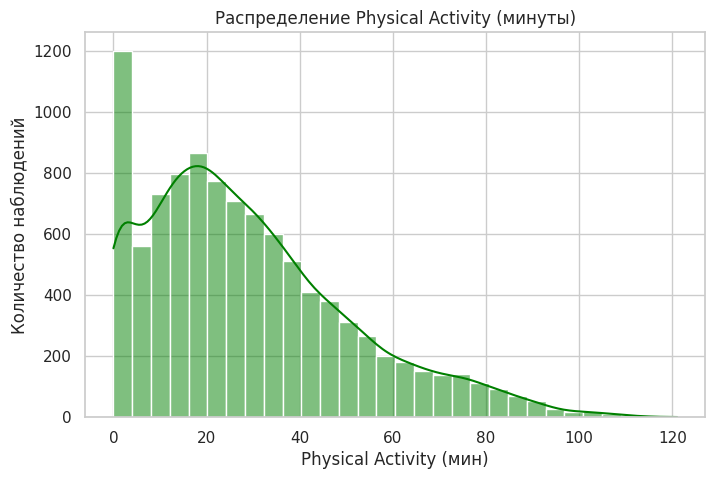

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df['physicalactivity_min'], kde=True, bins=30, color='green')
plt.title('Распределение Physical Activity (минуты)')
plt.xlabel('Physical Activity (мин)')
plt.ylabel('Количество наблюдений')
plt.grid(True)
plt.show()


Кореляция признаков с новым таргетом и *визуализация*

/tmp/ipython-input-15-4199268982.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_target.values, y=corr_with_target.index, palette='coolwarm')


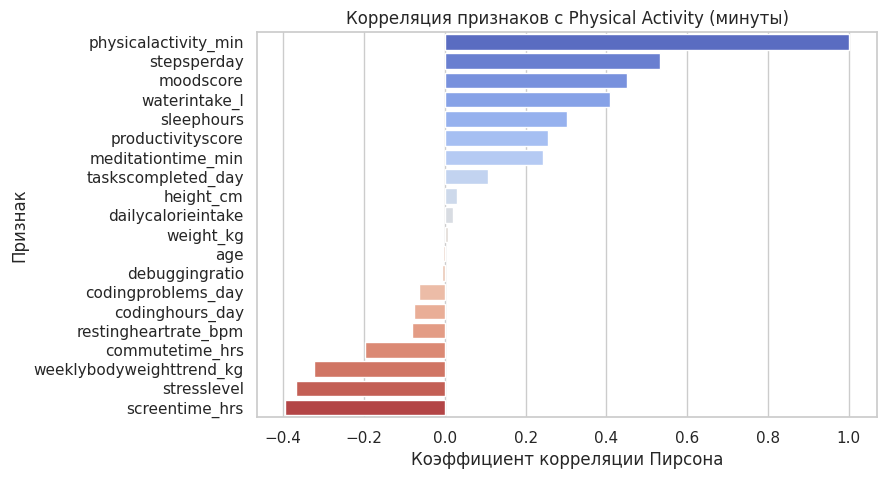

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
corr_matrix = df.corr(numeric_only=True)

# Отсортируем по корреляции с physicalactivity_min
corr_with_target = corr_matrix['physicalactivity_min'].sort_values(ascending=False)

sns.barplot(x=corr_with_target.values, y=corr_with_target.index, palette='coolwarm')
plt.title('Корреляция признаков с Physical Activity (минуты)')
plt.xlabel('Коэффициент корреляции Пирсона')
plt.ylabel('Признак')
plt.show()


Feature Engineering и анализ корреляций

Колонки в датасете: ['age', 'height_cm', 'weight_kg', 'dailycalorieintake', 'sleephours', 'physicalactivity_min', 'stepsperday', 'restingheartrate_bpm', 'waterintake_l', 'weeklybodyweighttrend_kg', 'screentime_hrs', 'commutetime_hrs', 'taskscompleted_day', 'productivityscore', 'stresslevel', 'moodscore', 'meditationtime_min', 'codinghours_day', 'codingproblems_day', 'debuggingratio', 'bmi']
Корреляция признаков с таргетом (после Feature Engineering и масштабирования):
physicalactivity_min        1.000000
stepsperday                 0.531835
moodscore                   0.451392
waterintake_l               0.409487
sleephours                  0.302512
productivityscore           0.254189
meditationtime_min          0.243045
taskscompleted_day          0.107495
height_cm                   0.029905
dailycalorieintake          0.019626
weight_kg                   0.007456
age                        -0.003876
bmi                        -0.006221
debuggingratio             -0.007075
codingpro

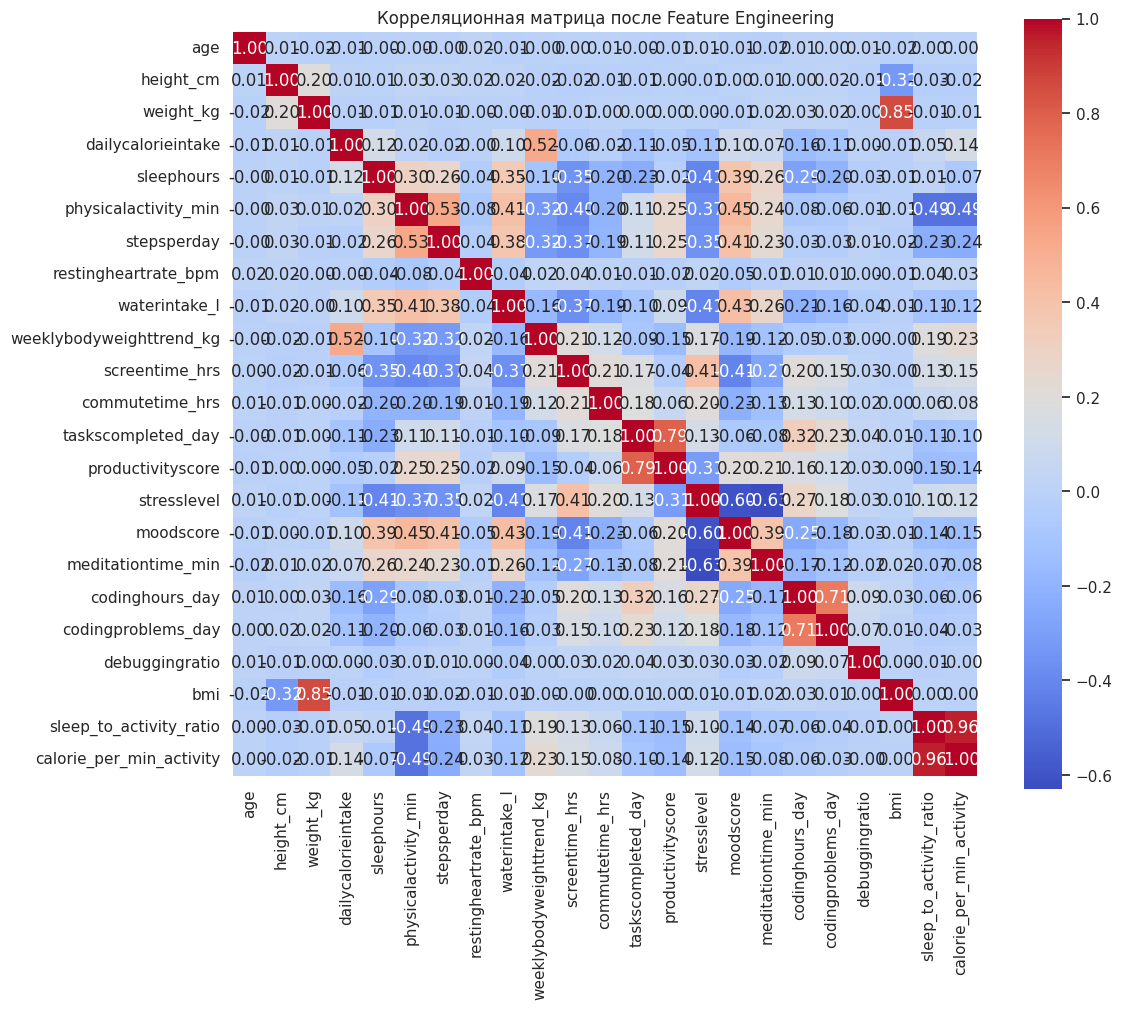

/tmp/ipython-input-19-852480598.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_target.values, y=corr_with_target.index, palette='viridis')


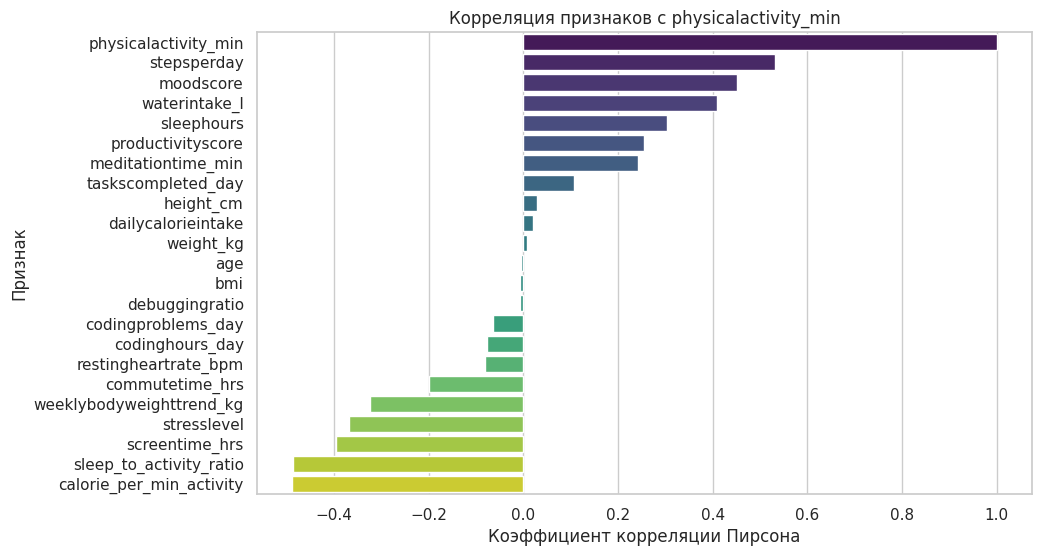

In [19]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Приведение названий колонок к нижнему регистру и заменяем пробелы на _
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Проверяем доступные колонки
print("Колонки в датасете:", df.columns.tolist())

# --- Feature Engineering ---

# Создаем новые признаки на основе имеющихся
df['bmi'] = df['weight_kg'] / ((df['height_cm'] / 100) ** 2)  # Индекс массы тела

# Пример: отношение времени сна к времени физической активности
df['sleep_to_activity_ratio'] = df['sleephours'] / (df['physicalactivity_min'] + 1)

# Пример: Калории на минуту физической активности
df['calorie_per_min_activity'] = df['dailycalorieintake'] / (df['physicalactivity_min'] + 1)

# --- Обработка пропусков в новых признаках ---
df.fillna(df.mean(numeric_only=True), inplace=True)

# --- Масштабирование числовых признаков ---
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[numeric_features] = scaler.fit_transform(df[numeric_features])

# --- Анализ корреляций с таргетом ---
target = 'physicalactivity_min'
corr_matrix = df_scaled.corr()
corr_with_target = corr_matrix[target].sort_values(ascending=False)

print("Корреляция признаков с таргетом (после Feature Engineering и масштабирования):")
print(corr_with_target)

# Визуализация корреляционной матрицы
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Корреляционная матрица после Feature Engineering')
plt.show()

# Визуализация корреляций с таргетом
plt.figure(figsize=(10, 6))
sns.barplot(x=corr_with_target.values, y=corr_with_target.index, palette='viridis')
plt.title(f'Корреляция признаков с {target}')
plt.xlabel('Коэффициент корреляции Пирсона')
plt.ylabel('Признак')
plt.show()


модель линейной регрессии

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

target = 'physicalactivity_min'
features = df.select_dtypes(include=['float64', 'int64']).columns.drop(target).tolist()

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

rmse_lm = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE линейной регрессии на тестовой выборке: {rmse_lm:.4f}')

print("\nКоэффициенты признаков:")
for feat, coef in zip(features, lin_reg.coef_):
    print(f'{feat}: {coef:.4f}')


RMSE линейной регрессии на тестовой выборке: 14.9035

Коэффициенты признаков:
age: 0.0073
height_cm: 0.0272
weight_kg: 0.0054
dailycalorieintake: 0.0053
sleephours: 1.5988
stepsperday: 0.0015
restingheartrate_bpm: -0.1442
waterintake_l: 4.9874
weeklybodyweighttrend_kg: -8.5133
screentime_hrs: -0.7112
commutetime_hrs: -0.9730
taskscompleted_day: 0.6908
productivityscore: -0.0539
stresslevel: -0.1949
moodscore: 1.3765
meditationtime_min: -0.0063
codinghours_day: -0.1928
codingproblems_day: 0.0901
debuggingratio: -0.6874
bmi: 0.0401
sleep_to_activity_ratio: -4.0746
calorie_per_min_activity: -0.0017


Градиентный бустинг LightGBM

In [27]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

target = 'physicalactivity_min'
features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
features.remove(target)

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = lgb.LGBMRegressor(objective='regression', random_state=42, n_estimators=100)

# Обучаем модель без ранней остановки
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse_gbm = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE LightGBM на тестовой выборке: {rmse_gbm:.4f}')

# Важность признаков
importances = model.feature_importances_
for feat, imp in zip(features, importances):
    print(f'{feat}: {imp}')


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003754 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3077
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 22
[LightGBM] [Info] Start training from score 29.151125
RMSE LightGBM на тестовой выборке: 0.9394
age: 36
height_cm: 61
weight_kg: 41
dailycalorieintake: 792
sleephours: 343
stepsperday: 65
restingheartrate_bpm: 16
waterintake_l: 42
weeklybodyweighttrend_kg: 39
screentime_hrs: 70
commutetime_hrs: 17
taskscompleted_day: 20
productivityscore: 42
stresslevel: 44
moodscore: 43
meditationtime_min: 35
codinghours_day: 31
codingproblems_day: 8
debuggingratio: 46
bmi: 64
sleep_to_activity_ratio: 386
calorie_per_min_activity: 759


Простяя нейросеть с помощью Keras

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Настройки
target = 'physicalactivity_min'

# Признаки — все числовые, кроме целевой переменной
features = df.select_dtypes(include=['float64', 'int64']).columns.drop(target).tolist()

# Подготовка данных
X = df[features].values
y = df[target].values

# Масштабирование
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделение на train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Модель нейросети
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Обучение модели
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Предсказания и метрика
y_pred = model.predict(X_test).flatten()
rmse_nn = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE нейросети на тестовой выборке: {rmse_nn:.4f}')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1015.2010 - val_loss: 195.7377
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 195.5720 - val_loss: 170.0802
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 170.3753 - val_loss: 151.5663
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 156.2161 - val_loss: 133.6755
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 137.2552 - val_loss: 118.9297
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 123.7711 - val_loss: 106.3541
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 109.2192 - val_loss: 96.6369
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 96.7472 - val_loss: 86.5157
Epoch 9/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 86.8491 - val_loss: 79.5891
Epoch 10/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 81.0443 - val_loss: 72.4449
Epoch 11/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 74.8392 - val_loss: 67.4780
Epoch 12/50
200/

Сравнение моделей

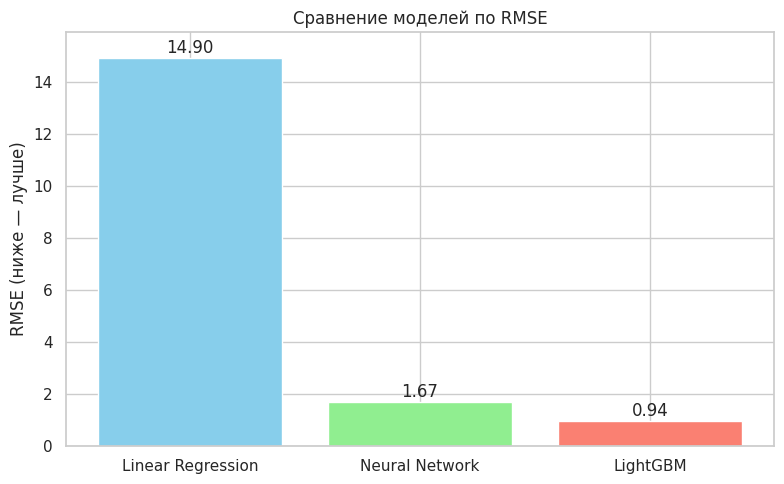

In [30]:
import matplotlib.pyplot as plt


models = ['Linear Regression', 'Neural Network', 'LightGBM']
rmse_values = [rmse_lm, rmse_nn, rmse_gbm]

plt.figure(figsize=(8, 5))
bars = plt.bar(models, rmse_values, color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Сравнение моделей по RMSE')
plt.ylabel('RMSE (ниже — лучше)')

# Подписи на столбиках
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.05, f'{yval:.2f}', ha='center', va='bottom')

plt.ylim(0, max(rmse_values) + 1)
plt.tight_layout()
plt.show()
